# Introduction

# Statistiques descriptives

Avant toute chose, nous importons les données. Afin que le notebook fonctionne correctement, veuillez modifier la variable "path" suivante en y indiquant votre chemin du dataset.

## 1) Premières statistiques


In [ ]:
path = 'D:\Downloads\python_project_dataset\python_project_dataset'

Ensuite, nous chargeons chaque classe de donnée dans une variable composé du nom de la classe.

In [ ]:
pull = os.listdir(path=path+'\pull')
tshirt = os.listdir(path=path+'\\tshirt')
short = os.listdir(path=path+'\short')
pantalon = os.listdir(path=path+'\pantalon')

Ainsi, pour avoir accès au premier pull du dataset il faut faire la commande suivante :



```
path + '\pull/' + pull[0]
```



Nous pouvons alors avoir les quelques statistiques suivantes :

In [ ]:
?first_stats

In [ ]:
first_stats()

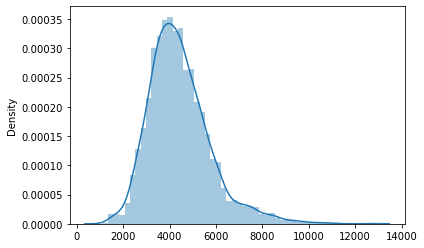

Étonnement, la distribution de la taille des fichiers semble suivre une loi normale !


## 2) Repartition des couleurs

Dans cette sous-partie, nous allons analyser la repartition de la couleur majoritaire de chaque vêtements par classe. Nous nous restreignons aux 12 couleurs suivantes : Blanc, Noir, Gris, Rouge, Marron, Jaune, Vert, Cyan, Bleu, Violet, Rose. Par exemple, pour tous les pulls, nous allons compter le nombre de pulls blancs, noirs, gris etc... Pour les vêtements qui ont plusieurs couleurs, nous prendrons en compte la couleur majoritaire. 

Pour ce faire, nous allons utiliser trois fonctions similaires (colour_repartition_mean, colour_reparition_cluster, colour_repartition_major) mais qui utilisent trois méthodes différentes ("mean", "cluster", "major") qui seront expliqués un peu plus loin. 

Chacune des ces fonctions utilisent la fonction "major_colour" qui, étant donné un triplet rgb donne la couleur la plus proche (parmis les couleurs citées précédemment) au sens de la distance euclidienne. Avant le traitement de l'image par ces fonctions, nous zoomons l'image afin de ne plus avoir les couleurs environnante (en particulier le blanc du fond) et nous concentrer sur la couleur du vêtement en elle-même. Nous utiliserons alors sans distinction "couleur de l'image" et "couleur du vêtement" dans la suite.

### 1) Méthode "mean"

La première méthode utilisée est celle que nous avons nommé "mean". C'est la méthode la plus naive. Il s'agit de faire la moyenne de la matrice RGB de tous les pixels de sorte à avoir le triplet (r,g,b) moyen de l'image. On calcule ensuite la couleur la plus proche grace à la fonction "major_colour".

In [ ]:
?colour_repartition_mean

In [ ]:
pull_colours_mean = colour_repartition_mean('pull', percentage = 1)
tshirt_colours_mean = colour_repartition_mean('tshirt', percentage = 1)
pantalon_colours_mean = colour_repartition_mean('pantalon', percentage = 1)
short_colours_mean = colour_repartition_mean('short', percentage = 1)

Les variables que nous venont de créer sont des dictionnaires dont les clés sont des couleurs et dont les valeurs comptabilisent le nombre de vêtements de la même couleur que la clé associée.

Par exemple, la dernière ligne nous donne 

```
# {'Blanc': 14,
 'Noir': 40,
 'Gris': 181,
 'Rouge': 5,
 'Marron': 15,
 'Jaune': 1,
 'Vert': 1,
 'Cyan': 2,
 'Bleu': 40,
 'Violet': 57,
 'Rose': 2}
```

Il y a donc 14 shorts blancs, 40 shorts bleus etc...


On peut alors tracer un histogramme du nombre de couleurs pour chaque classe.

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,10))
plt.suptitle('Repartition des couleurs avec la méthode colour_repartition_mean', fontsize=20)
plt.subplot(221)
sns.barplot(y=list(pull_colours_mean.keys()), 
            x=list(pull_colours_mean.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pulls')

plt.subplot(222)
sns.barplot(y=list(short_colours_mean.keys()), 
            x=list(short_colours_mean.values()), 
            palette=['white', 'black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Shorts')

plt.subplot(223)
sns.barplot(y=list(pantalon_colours_mean.keys()), 
            x=list(pantalon_colours_mean.values()), 
            palette=['white','black','grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pantalons')

plt.subplot(224)
sns.barplot(y=list(tshirt_colours_mean.keys()), 
            x=list(tshirt_colours_mean.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Tshirts')

Les resultats peuvent être long à obtenir lorsque "percentage=1", nous affichons les histogrammes obtenus avec toute la base de donnée ci-après.

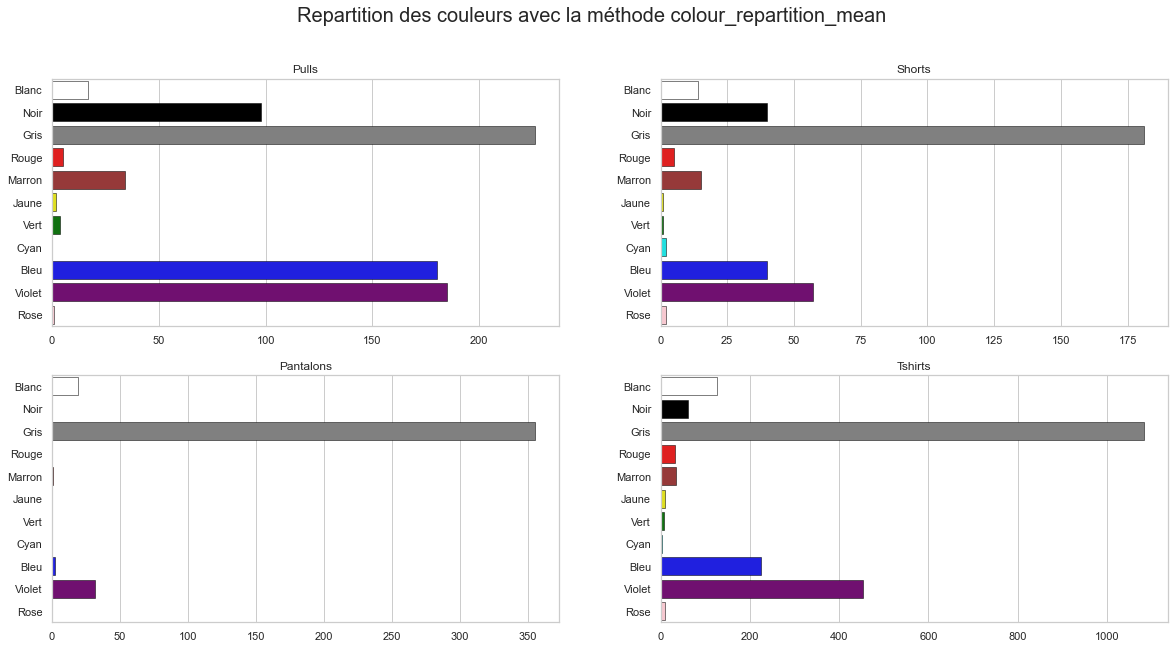

On remarque que le gris est plutôt majoritaire. Cela est causé par la méthode employée. En effet, faire une moyenne du RGB de tous les pixels est susceptible de nous donner un triplet (r,g,b) tels que r,g et b soient plutôt proche, ce qui correspond à du gris. Ce problème est resolu par la méthode suivante.

## 2) Méthode "major"

La méthode major repose sur le principe suivant : on determine la couleur la plus proche de chaque pixel d'une image à l'aide de "major_colour". La couleur qui a le plus de pixel associé est designée comme la couleur du vêtement. Les variables suivantes sont crées d'une façon similaire à celles précédemment crées.

In [ ]:
?colour_repartition_major

In [ ]:
pull_colours_major = colour_repartition_major('pull', percentage=1)
tshirt_colours_major = colour_repartition_major('tshirt', percentage=1)
pantalon_colours_major = colour_repartition_major('pantalon', percentage=1)
short_colours_major = colour_repartition_major('short', percentage=1)

**Attention** : la cellule prend plusieurs heures pour se lancer, il est donc préférable de changer la variable percentage (qui règle le pourcentage du dataset à charger dans l'utilisation de la fonction) à 0.1 voire 0.01.

On peut tracer les histogrammes pour chaque classe.

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,10))
plt.suptitle('Repartition des couleurs avec la méthode colour_repartition_major', fontsize=20)
plt.subplot(221)
sns.barplot(y=list(pull_colours_major.keys()), 
            x=list(pull_colours_major.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue','purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pulls')

plt.subplot(222)
sns.barplot(y=list(short_colours_major.keys()), 
            x=list(short_colours_major.values()), 
            palette=['white', 'black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Shorts')

plt.subplot(223)
sns.barplot(y=list(pantalon_colours_major.keys()), 
            x=list(pantalon_colours_major.values()), 
            palette=['white','black','grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pantalons')

plt.subplot(224)
sns.barplot(y=list(tshirt_colours_major.keys()), 
            x=list(tshirt_colours_major.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Tshirts')

Pour les mêmes raisons que précédemment, nous affichons les graphiques obtenus avec l'ensemble de la base de donées.

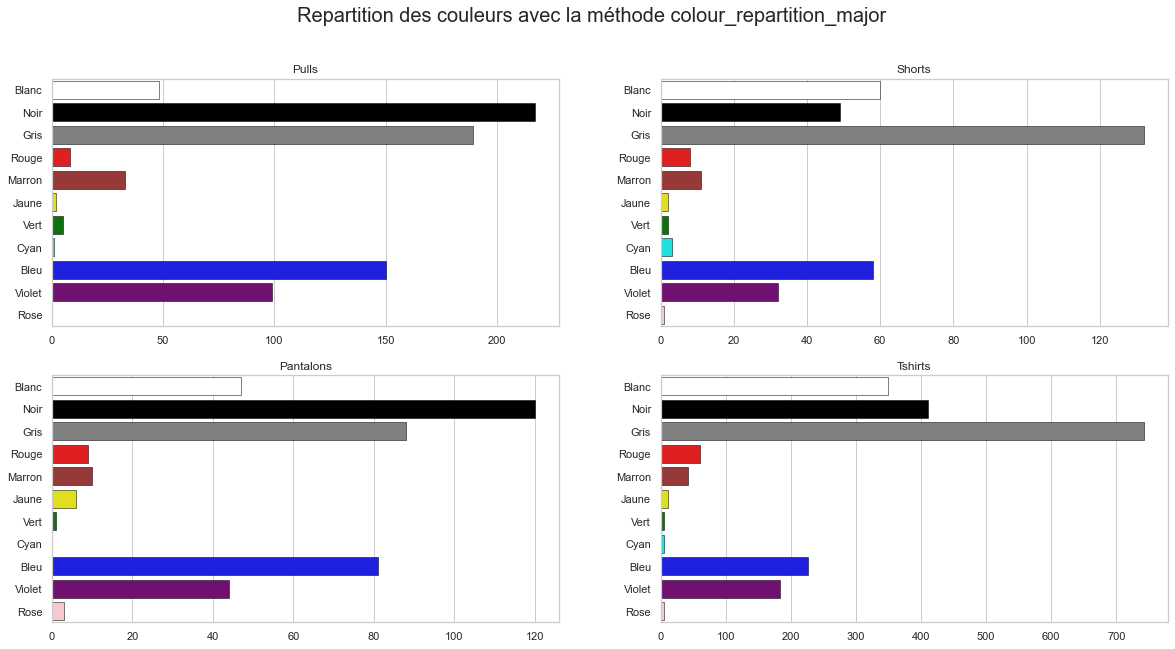

On remarque que le problème précédent semble réglé : dans deux cas sur trois, le gris n'est plus la couleur majoritaire. Le gris reste cependant assez prédominant (ainsi que le blanc et le noir) mais cela est dû au fait que la majorité des vêtements sont d'une de ces trois couleurs.

## 3) Méthode "cluster"

Cette méthode est basé sur l'algorithme des k-means. Nous choisissons le nombre de cluster égal à 2 car après quelques essais, cela semble être le plus efficace. Cela reste cependant arbitraire, étant donné que ce n'est pas le coeur du projet et que cette partie nous permet surtout d'avoir une première idée du dataset, nous n'avons pas poussé l'optimisation au maximum.

In [ ]:
?colour_repartition_cluster

In [ ]:
pull_colours_cluster = colour_repartition_cluster('pull', percentage=1, ncluster=2)
tshirt_colours_cluster = colour_repartition_cluster('tshirt',percentage=1, ncluster=2)
pantalon_colours_cluster = colour_repartition_cluster('pantalon', percentage=1, ncluster=2)
short_colours_cluster = colour_repartition_cluster('short', percentage=1, ncluster=2)

Ainsi que les histogrammes correspondants.

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,10))
plt.suptitle('Repartition des couleurs avec la méthode colour_repartition_cluster', fontsize=20)
plt.subplot(221)
sns.barplot(y=list(pull_colours_cluster.keys()), 
            x=list(pull_colours_cluster.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pulls')

plt.subplot(222)
sns.barplot(y=list(short_colours_cluster.keys()), 
            x=list(short_colours_cluster.values()), 
            palette=['white', 'black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue','purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Shorts')

plt.subplot(223)
sns.barplot(y=list(pantalon_colours_cluster.keys()), 
            x=list(pantalon_colours_cluster.values()), 
            palette=['white','black','grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue','purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Pantalons')

plt.subplot(224)
sns.barplot(y=list(tshirt_colours_cluster.keys()), 
            x=list(tshirt_colours_cluster.values()), 
            palette=['white','black', 'grey', 'red', 'brown', 'yellow','green', 'cyan', 'blue', 'purple', 'pink'],
            linewidth=0.5,
            edgecolor='black')
plt.title('Tshirts')

Enfin, les histogrames obtenus pour la base de données complète.

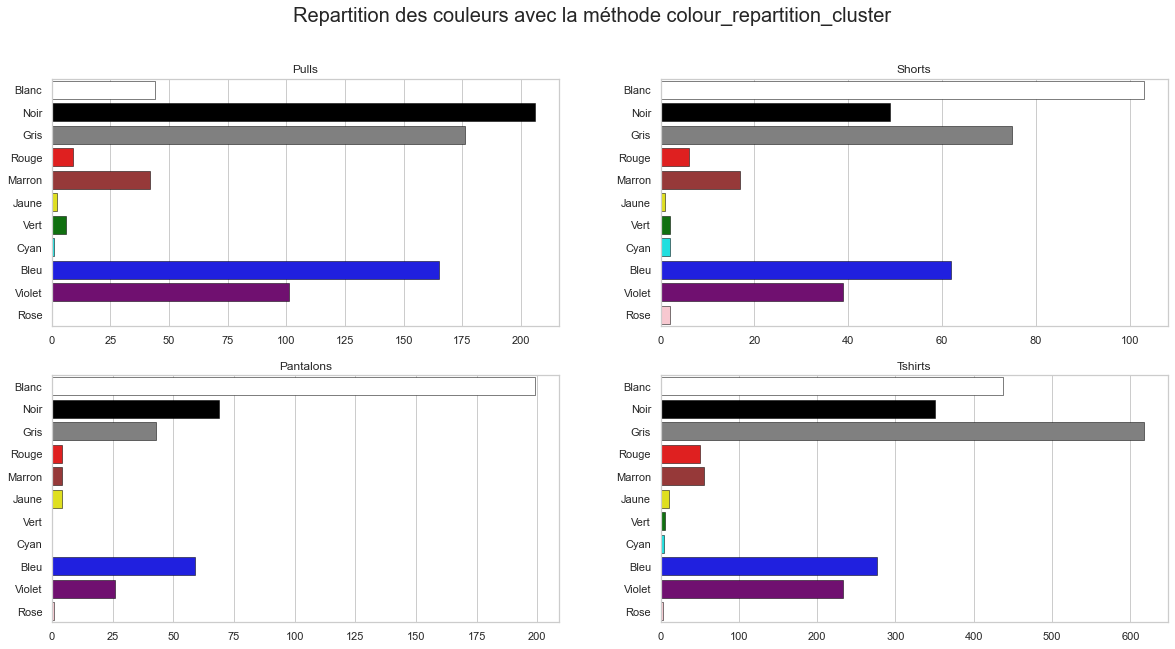

La quantité de vêtements gris a diminué, mais on note une recrudescence des vêtements de couleur blanche. On remarque c'est le cas surtout pour les shorts et les pantalons : le zoom de l'image qui nous permet de nous debarasser du fond blanc fonctionne moins bien sur les shorts et les pantalons (vu la disposition de ces derniers), ce qui peut expliquer la grande quantité de vêtements considérés comme blancs.